<a href="https://colab.research.google.com/github/kk-shetty/data_science_ik/blob/main/projects/ml_mini_project/EDA_edge_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Reading sample edge file uploaded on Google Drive using networkx
import networkx as nx
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Mounting Google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load file
sample_edge_file = '/content/drive/My Drive/ml_mini_project_data/sample_network.txt'
sample_network = nx.read_edgelist(sample_edge_file)

In [5]:
# Basic details about the network
print("Number of nodes:", sample_network.number_of_nodes())
print("Number of edges:", sample_network.number_of_edges())

Number of nodes: 21
Number of edges: 31


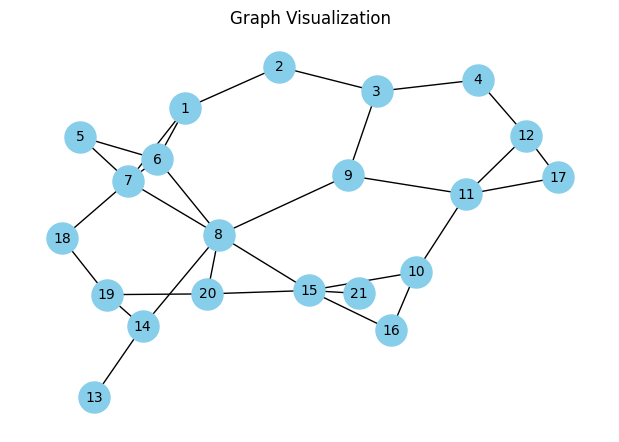

In [24]:
# Plotting the network for visualization
plt.figure(figsize=(6,4))
pos = nx.spring_layout(sample_network)
nx.draw(sample_network, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='black', linewidths=1, font_size=10)
plt.title("Graph Visualization")
plt.show()

In [6]:
# Function to plot ego network to visualize indivizual ego network/s
def plot_ego_network_feature(network, node):

    ego_net_1 = nx.ego_graph(network, node)
    ego_net_2 = nx.ego_graph(network, node, radius=2)
    print(f'Ego Network for node - {node}')

    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))

    # Plot ego_net_1
    axs[0].set_title("1st Ego Network")
    pos_1 = nx.spring_layout(ego_net_1)
    nx.draw(ego_net_1, pos_1, with_labels=True, node_color='skyblue', node_size=500, edge_color='black', linewidths=1, font_size=10, ax=axs[0])

    # Plot ego_net_2
    axs[1].set_title("2nd Ego Network")
    pos_2 = nx.spring_layout(ego_net_2)
    nx.draw(ego_net_2, pos_2, with_labels=True, node_color='skyblue', node_size=500, edge_color='black', linewidths=1, font_size=10, ax=axs[1])

    plt.show()

Ego Network for node - 1


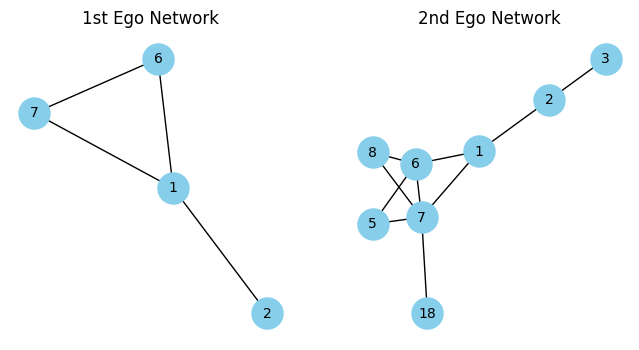

Ego Network for node - 2


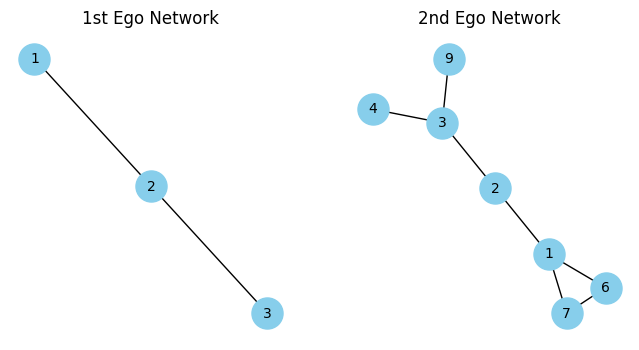

Ego Network for node - 6


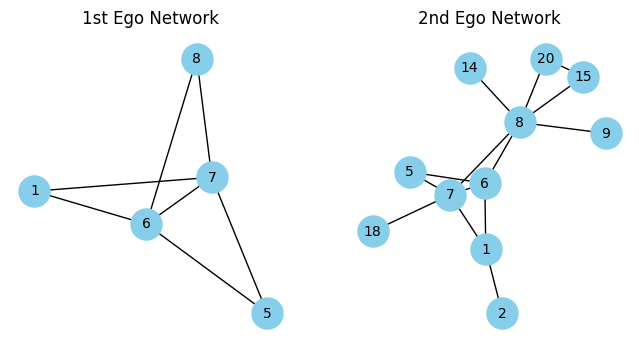

Ego Network for node - 7


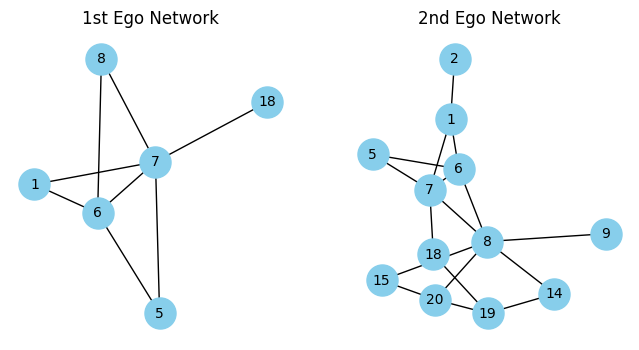

Ego Network for node - 3


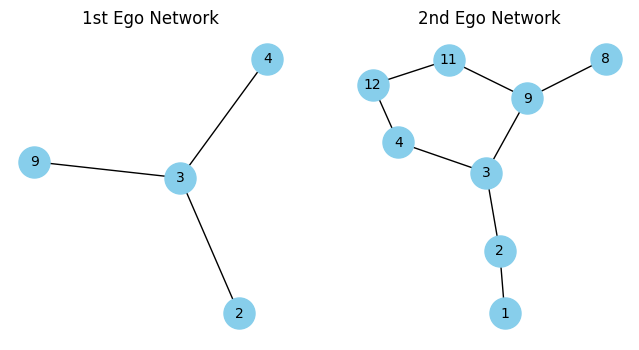

Ego Network for node - 4


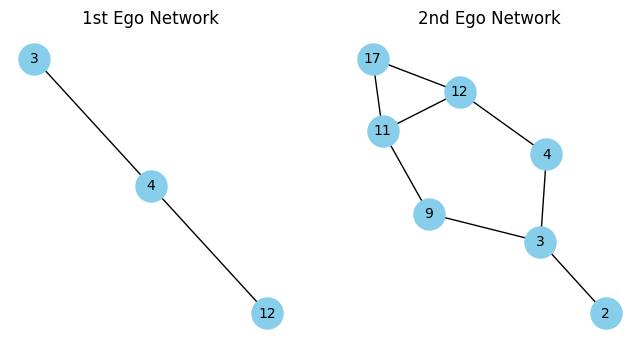

Ego Network for node - 9


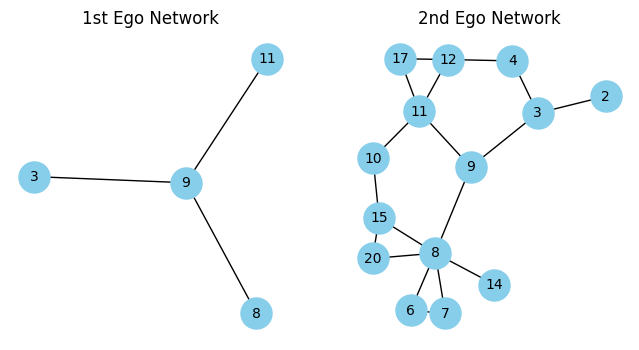

Ego Network for node - 12


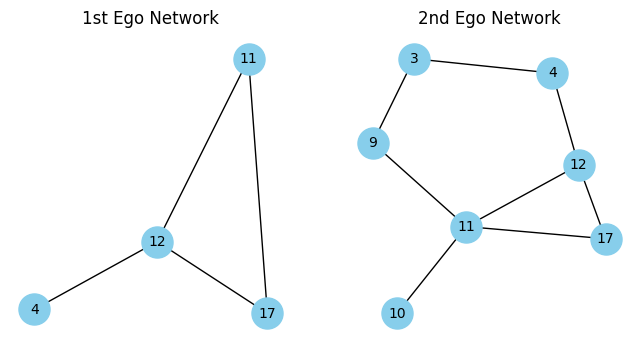

Ego Network for node - 5


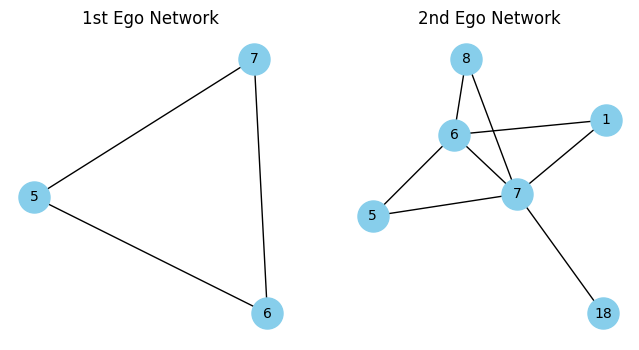

Ego Network for node - 8


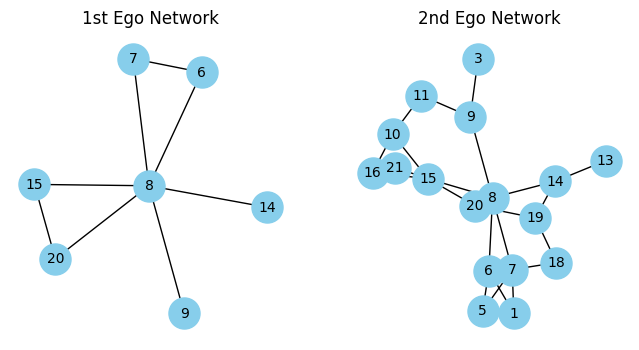

Ego Network for node - 18


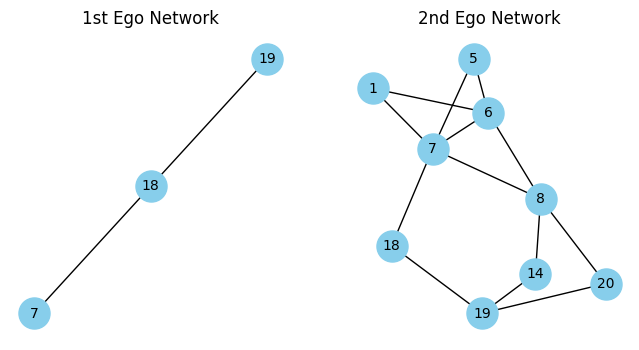

Ego Network for node - 14


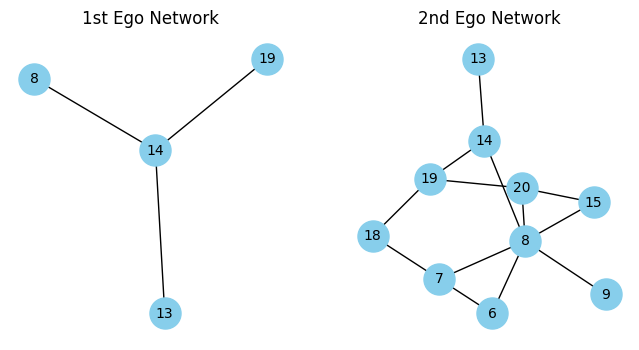

Ego Network for node - 15


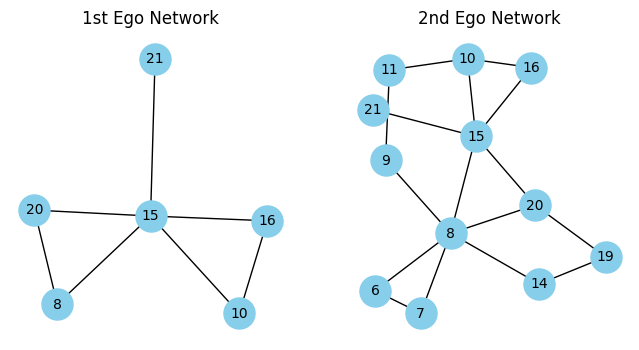

Ego Network for node - 20


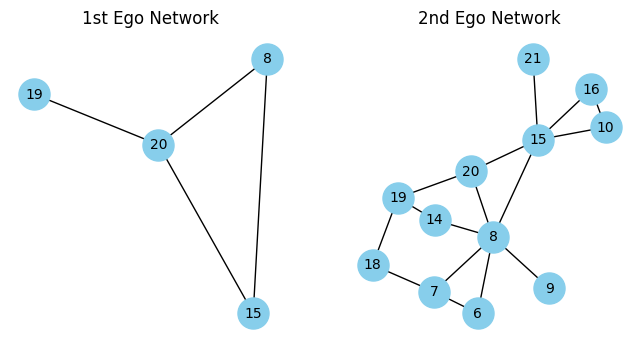

Ego Network for node - 11


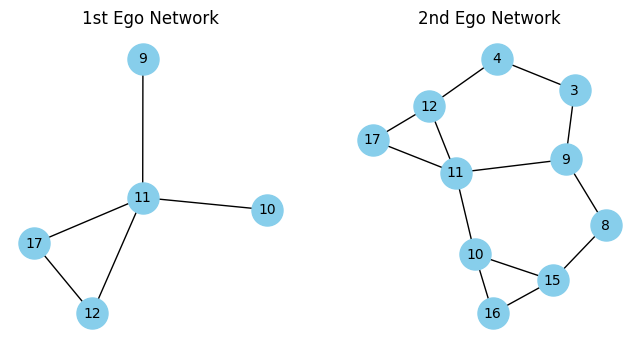

Ego Network for node - 10


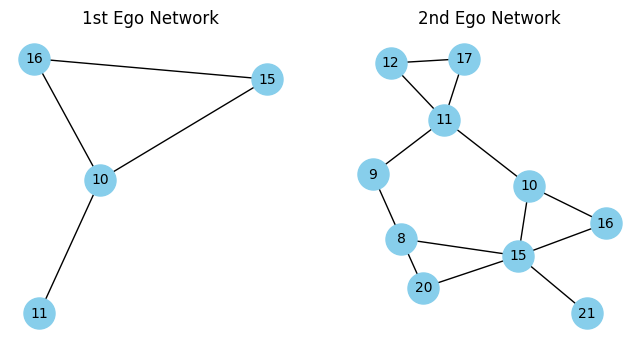

Ego Network for node - 16


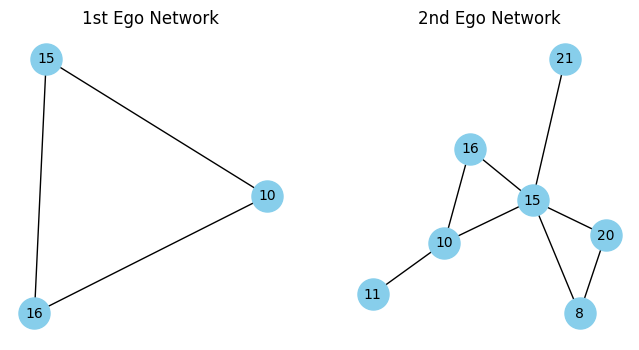

Ego Network for node - 17


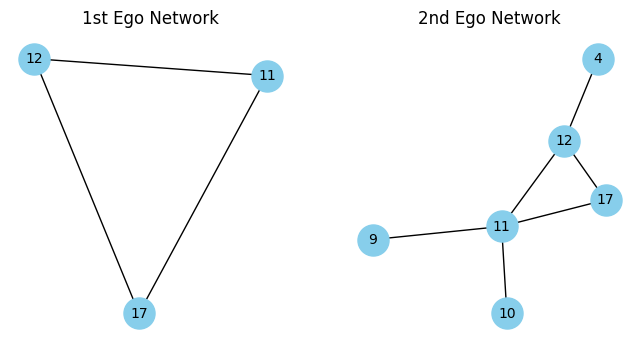

Ego Network for node - 13


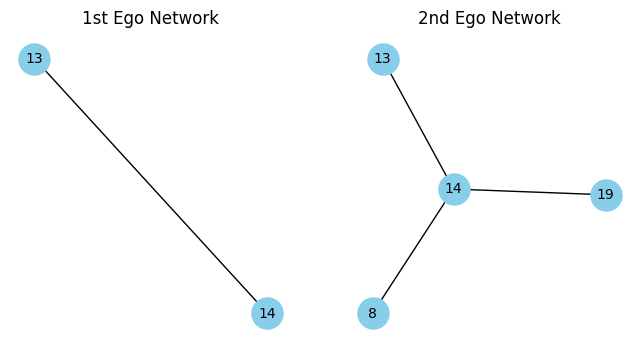

Ego Network for node - 19


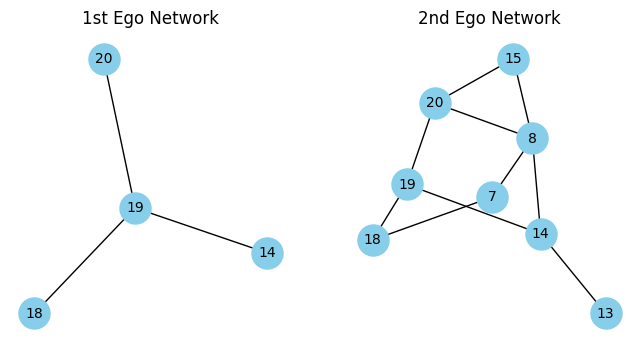

Ego Network for node - 21


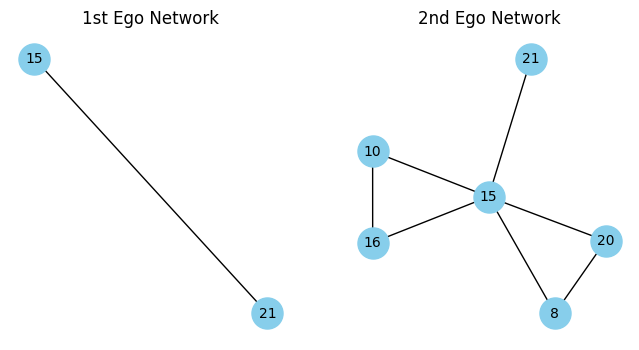

In [7]:
# Plotting 1st and 2nd ego network of each node in the sample network
for node in sample_network.nodes():
    plot_ego_network_feature(sample_network, node)

In [8]:
# Function to extract ego network features:
def extract_ego_network_feature(network, node, radius=1):

    ego_net = nx.ego_graph(network, node, radius=radius)
    features = {}

    # Ego netwrok properties
    features['number_of_nodes'] = ego_net.number_of_nodes()
    features['number_of_edges'] = ego_net.number_of_edges()
    features['ego_density'] = nx.density(ego_net)
    features['triangle_count'] = sum(nx.triangles(ego_net).values())//3

    # calculate clustering coefficient only for first ego network
    if radius==1:
        features['node_clustering_coefficient'] = nx.clustering(ego_net, node)

    return features

In [9]:
# Generating 1st Ego Network Features
ego_network_features_1 = {}

for node in sample_network.nodes():
    ego_network_features_1[node] = extract_ego_network_feature(sample_network, node, radius=1)

In [10]:
# Generating 2nd Ego Network Features
ego_network_features_2 = {}

for node in sample_network.nodes():
    ego_network_features_2[node] = extract_ego_network_feature(sample_network, node, radius=2)

In [11]:
print(f"Node:\tENodes\tEEdges\tTriangles\tEDensity\tClustCoEf")
for node, properties in ego_network_features_1.items():
    print(f"{node}\t{properties['number_of_nodes']}\t{properties['number_of_edges']}\t{properties['triangle_count']}\t{properties['ego_density']}\t{properties['node_clustering_coefficient']}")

Node:	ENodes	EEdges	Triangles	EDensity	ClustCoEf
1	4	4	1	0.6666666666666666	0.3333333333333333
2	3	2	0	0.6666666666666666	0
6	5	7	3	0.7	0.5
7	6	8	3	0.5333333333333333	0.3
3	4	3	0	0.5	0
4	3	2	0	0.6666666666666666	0
9	4	3	0	0.5	0
12	4	4	1	0.6666666666666666	0.3333333333333333
5	3	3	1	1.0	1.0
8	7	8	2	0.38095238095238093	0.13333333333333333
18	3	2	0	0.6666666666666666	0
14	4	3	0	0.5	0
15	6	7	2	0.4666666666666667	0.2
20	4	4	1	0.6666666666666666	0.3333333333333333
11	5	5	1	0.5	0.16666666666666666
10	4	4	1	0.6666666666666666	0.3333333333333333
16	3	3	1	1.0	1.0
17	3	3	1	1.0	1.0
13	2	1	0	1.0	0
19	4	3	0	0.5	0
21	2	1	0	1.0	0


In [12]:
print(f"Node:\tENodes\tEEdges\tTriangles\tEDensity")
for node, properties in ego_network_features_2.items():
    print(f"{node}\t{properties['number_of_nodes']}\t{properties['number_of_edges']}\t{properties['triangle_count']}\t{properties['ego_density']}")

Node:	ENodes	EEdges	Triangles	EDensity
1	8	10	3	0.35714285714285715
2	7	7	1	0.3333333333333333
6	11	14	4	0.2545454545454545
7	12	17	4	0.25757575757575757
3	8	8	0	0.2857142857142857
4	7	8	1	0.38095238095238093
9	14	18	3	0.1978021978021978
12	7	8	1	0.38095238095238093
5	6	8	3	0.5333333333333333
8	17	24	5	0.17647058823529413
18	9	13	3	0.3611111111111111
14	10	13	2	0.28888888888888886
15	12	16	3	0.24242424242424243
20	12	16	3	0.24242424242424243
11	10	13	2	0.28888888888888886
10	10	13	3	0.28888888888888886
16	7	8	2	0.38095238095238093
17	6	6	1	0.4
13	4	3	0	0.5
19	8	10	1	0.35714285714285715
21	6	7	2	0.4666666666666667


Ego Network for node - 8


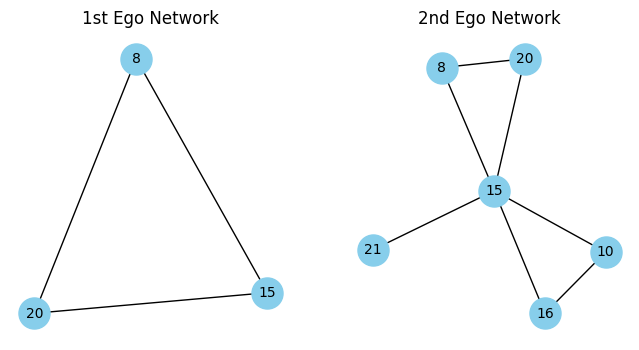

Ego Network for node - 16


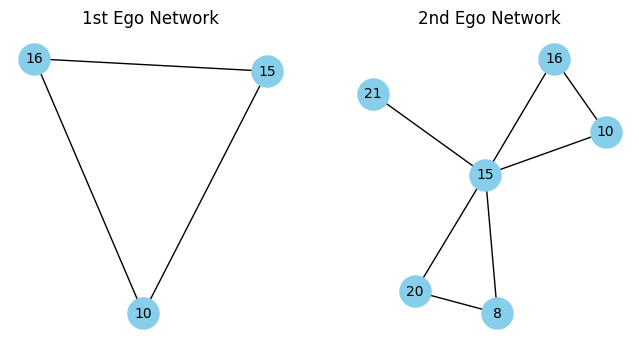

Ego Network for node - 21


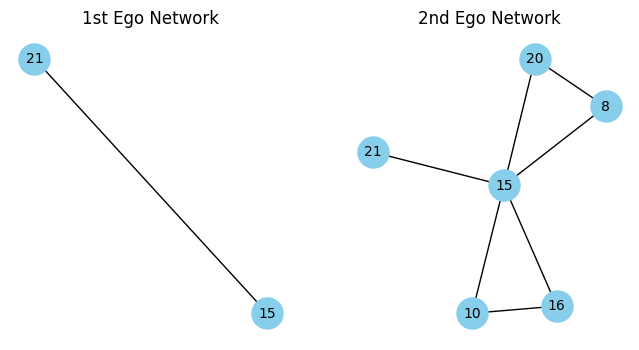

Ego Network for node - 20


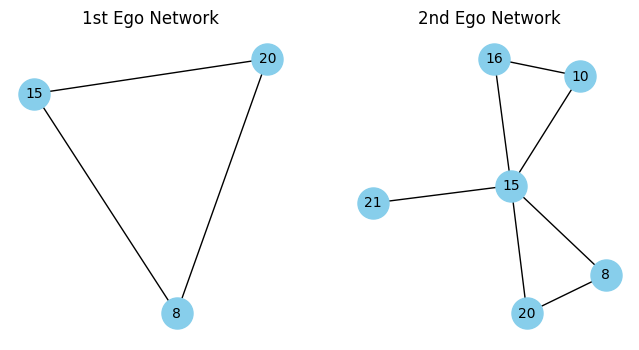

Ego Network for node - 15


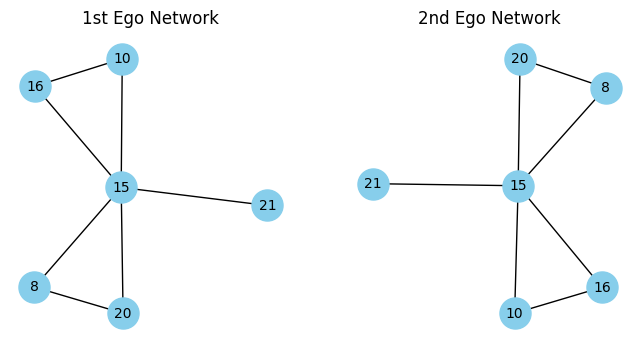

Ego Network for node - 10


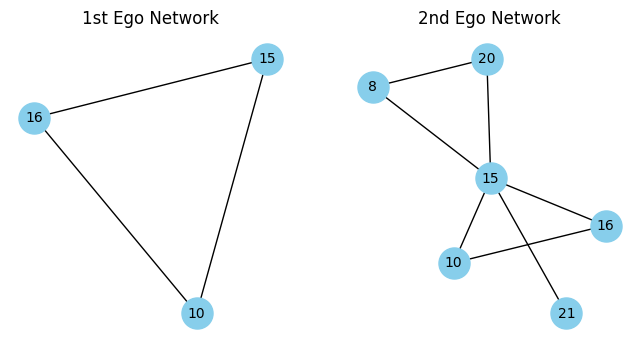

In [13]:
# Testing
test_network = nx.ego_graph(sample_network, '15')

for node in test_network.nodes():
    plot_ego_network_feature(test_network, node)

In [14]:
[node for node in test_network.neighbors('15')]

['8', '16', '21', '20', '10']

In [15]:
test_network.edges()

EdgeView([('8', '15'), ('8', '20'), ('16', '10'), ('16', '15'), ('21', '15'), ('20', '15'), ('15', '10')])

In [16]:
nx.triangles(test_network)

{'8': 1, '16': 1, '21': 0, '20': 1, '15': 2, '10': 1}

In [17]:
for cycle in nx.cycle_basis(test_network):
    print(cycle)
    # plt.figure(figsize=(2,2))
    # pos = nx.spring_layout(cycle)
    # nx.draw(cycle, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='black', linewidths=1, font_size=10)
    # plt.title("Graph Visualization")
    # plt.show()


['16', '15', '10']
['8', '20', '15']


In [18]:
test_network_2 = nx.ego_graph(sample_network, '7')

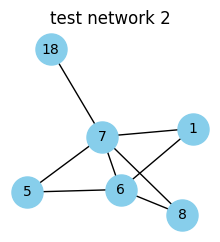

In [19]:
plt.figure(figsize=(2,2))
pos = nx.spring_layout(test_network_2)
nx.draw(test_network_2, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='black', linewidths=1, font_size=10)
plt.title("test network 2")
plt.show()

In [20]:
for cycle in nx.cycle_basis(test_network_2):
    print(cycle)

['6', '1', '7']
['6', '5', '7']
['6', '8', '7']


In [21]:
test_network_2.edges()

EdgeView([('6', '1'), ('6', '5'), ('6', '7'), ('6', '8'), ('8', '7'), ('5', '7'), ('18', '7'), ('1', '7')])

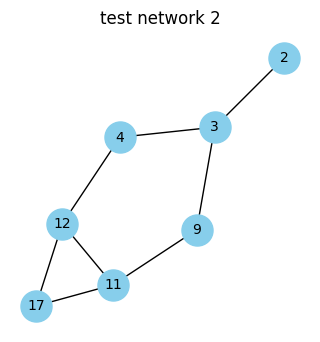

In [5]:
test_network_4 = nx.ego_graph(sample_network, '4', radius=2)
plt.figure(figsize=(3,3))
pos = nx.spring_layout(test_network_4)
nx.draw(test_network_4, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='black', linewidths=1, font_size=10)
plt.title("test network 2")
plt.show()

In [6]:
cycle_counts = {3:0, 4:0, 5:0, 6:0, 7:0, 8:0}
for cycle in nx.cycle_basis(test_network_4):
    cycle_counts[len(cycle)] += 1
cycle_counts

{3: 1, 4: 0, 5: 1, 6: 0, 7: 0, 8: 0}

In [59]:
nx.diameter(test_network_4)

4

In [8]:
def extract_local_fetures(local_network, node, radius):

    features = {}
    cycle_counts = {3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0, 10:0, 11:0, 12:0, 'large':0}

    # Ego netwrok properties
    features[f'EN{radius}_number_of_nodes'] = local_network.number_of_nodes()
    features[f'EN{radius}_number_of_edges'] = local_network.number_of_edges()
    features[f'EN{radius}_ego_density'] = nx.density(local_network)

    # Actual radius, diameter and center based on local network
    if node in nx.center(local_network):
        features[f'EN{radius}_is_center'] = 1
    else:
        features[f'EN{radius}_is_center'] = 0

    features[f'EN{radius}_radius'] = nx.radius(local_network)
    features[f'EN{radius}_diameter'] = nx.diameter(local_network)

    # Cycle counts of different length till 8
    for cycle in nx.simple_cycles(local_network):
        if len(cycle) > 12:
            cycle_counts['large'] += 1
        else:
            cycle_counts[len(cycle)] += 1

    for length, count in cycle_counts.items():
        features[f'EN{radius}_cycle_of_{length}'] = count

    # calculate clustering coefficient only for first ego network
    if radius==1:
        features['node_clustering_coefficient'] = nx.clustering(local_network, node)

    return features


In [9]:
local_features = {}
for node in sample_network.nodes():
    local_features[node] = {}
    for radius in range(1,5):
        ego_network = nx.ego_graph(sample_network, node, radius=radius)
        local_features[node].update(extract_local_fetures(ego_network, node, radius))

In [10]:
df = pd.DataFrame.from_dict(local_features, orient='index')
df.head(20)

,EN1_number_of_nodes,EN1_number_of_edges,EN1_ego_density,EN1_is_center,EN1_radius,EN1_diameter,EN1_cycle_of_3,EN1_cycle_of_4,EN1_cycle_of_5,EN1_cycle_of_6,...,EN4_cycle_of_4,EN4_cycle_of_5,EN4_cycle_of_6,EN4_cycle_of_7,EN4_cycle_of_8,EN4_cycle_of_9,EN4_cycle_of_10,EN4_cycle_of_11,EN4_cycle_of_12,EN4_cycle_of_large
1,4,4,0.666667,1,1,2,1,0,0,0,...,4,5,7,8,6,10,16,24,28,92
2,3,2,0.666667,1,1,2,0,0,0,0,...,4,5,7,7,6,9,15,21,23,81
6,5,7,0.700000,1,1,2,3,3,0,0,...,4,5,8,8,6,11,20,29,37,164
7,6,8,0.533333,1,1,2,3,3,0,0,...,4,5,8,8,6,11,20,29,37,164
3,4,3,0.500000,1,1,2,0,0,0,0,...,4,5,8,8,6,11,20,29,37,164
4,3,2,0.666667,1,1,2,0,0,0,0,...,1,2,5,3,1,7,15,17,14,10
9,4,3,0.500000,1,1,2,0,0,0,0,...,4,5,8,8,6,11,20,29,37,164
12,4,4,0.666667,1,1,2,1,0,0,0,...,1,2,5,3,1,7,15,17,14,10
5,3,3,1.000000,1,1,1,1,0,0,0,...,4,4,7,8,5,6,11,15,15,33
8,7,8,0.380952,1,1,2,2,0,0,0,...,4,5,8,8,6,11,20,29,37,164


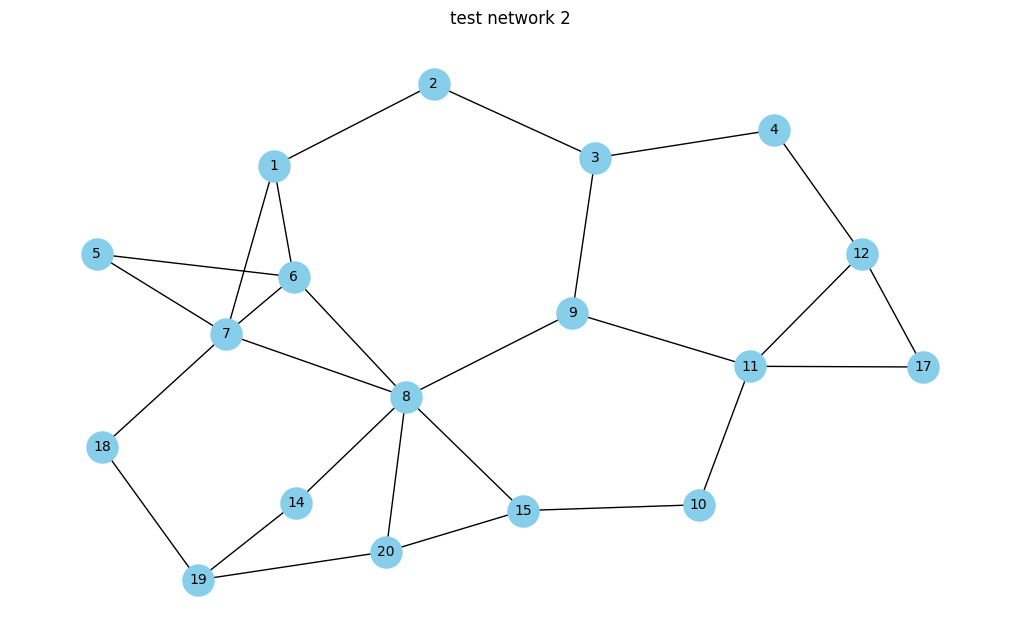

In [6]:
test_network_2_4 = nx.ego_graph(sample_network, '2', radius=4)
plt.figure(figsize=(10,6))
pos = nx.kamada_kawai_layout(test_network_2_4)
nx.draw(test_network_2_4, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='black', linewidths=1, font_size=10)
plt.title("test network 2")
plt.show()

In [11]:
# for cycle in nx.simple_cycles(test_network_2_4):
#     print(cycle)

# for cycle in nx.chordless_cycles(test_network_2_4):
#     print(cycle)

'10' in nx.center(test_network_4)

NameError: name 'test_network_4' is not defined

In [12]:
df.nunique()[:70]

EN1_number_of_nodes    6
EN1_number_of_edges    7
EN1_ego_density        7
EN1_is_center          1
EN1_radius             1
                      ..
EN4_cycle_of_9         8
EN4_cycle_of_10        7
EN4_cycle_of_11        8
EN4_cycle_of_12        8
EN4_cycle_of_large     7
Length: 69, dtype: int64